In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
transactions_df = pd.read_csv("./data/Transactions.csv")
customers_df = pd.read_csv("./data/Customers.csv")
products_df = pd.read_csv("./data/Products.csv")

In [3]:
transactions_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [4]:
customers_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [5]:
products_df

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


##### **01. Top Performing Categories**

In [6]:
data = transactions_df.merge(customers_df, on="CustomerID").merge(products_df, on="ProductID")
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [12]:
category_sales=data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
category_sales

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

In [14]:
product_sales = data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False)
product_sales.head()

ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64

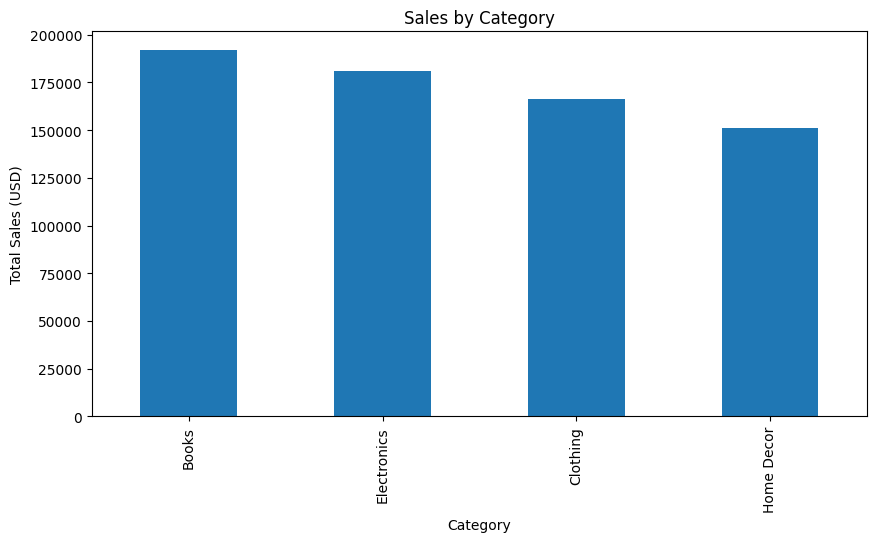

In [16]:
category_sales.plot(kind='bar', figsize=(10, 5), title="Sales by Category")
plt.ylabel("Total Sales (USD)")
plt.show()

#### **02. Sales By Region**

In [17]:
region_sales = data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("Sales by Region:\n", region_sales)

Sales by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


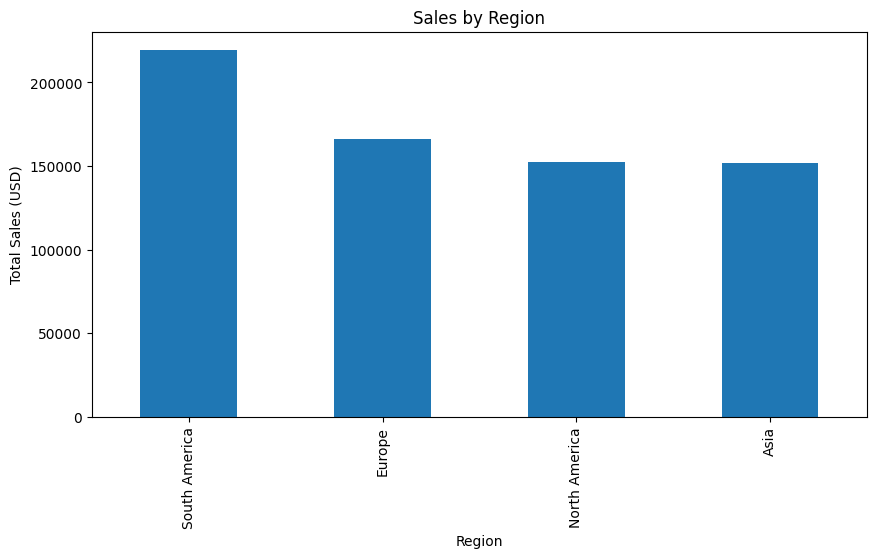

In [18]:
region_sales.plot(kind='bar', figsize=(10, 5), title="Sales by Region")
plt.ylabel("Total Sales (USD)")
plt.show()

##### **03. Most Customers from Region**

In [20]:
customers_per_region = customers_df.groupby("Region")["CustomerID"].nunique().sort_values(ascending=False)
print("Number of Customers by Region:\n", customers_per_region)

Number of Customers by Region:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: CustomerID, dtype: int64


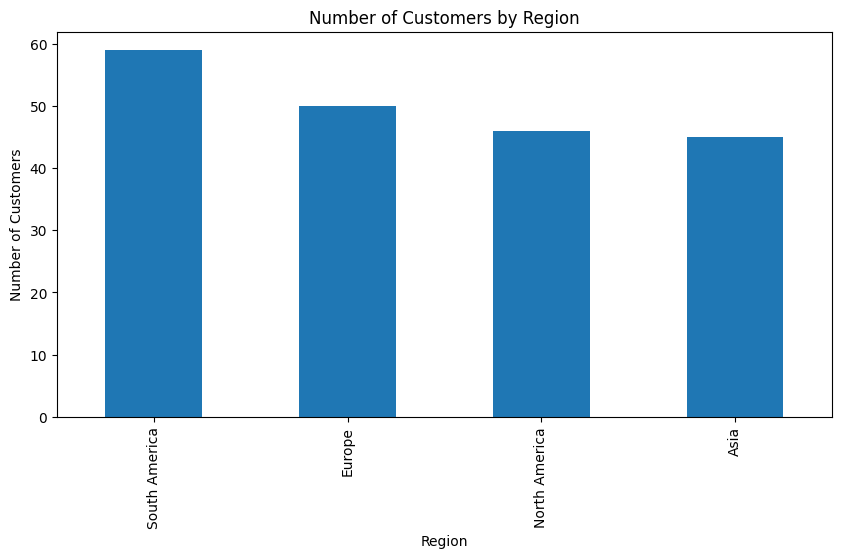

In [22]:
plt.figure(figsize=(10, 5))
customers_per_region.plot(kind="bar", title="Number of Customers by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.show()


##### **04. Most sold product for the region with high number of customers**

In [32]:
most_customers_region = customers_df.groupby("Region")["CustomerID"].nunique().idxmax()
print(f"Region with the most customers: {most_customers_region}")

Region with the most customers: South America


In [33]:
region_data = data[data["Region"] == most_customers_region]

most_sold_product = region_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False)
print(f"Most sold product in {most_customers_region}:\n", most_sold_product.head(1))

Most sold product in South America:
 ProductName
ActiveWear Textbook    38
Name: Quantity, dtype: int64


##### **05. Sales Trend TimeSeries**

In [34]:
data["TransactionDate"] = pd.to_datetime(data["TransactionDate"])
sales_trend = data.groupby(data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()

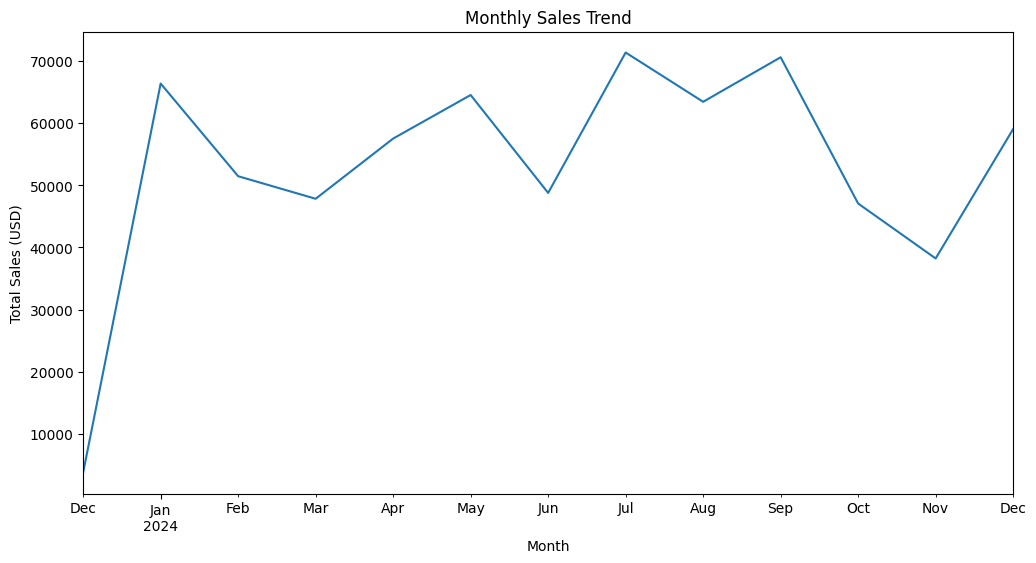

In [35]:
sales_trend.plot(figsize=(12, 6), title="Monthly Sales Trend")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Month")
plt.show()

##### **06. Category Performance Over Time**

In [44]:
data["Month"] = data["TransactionDate"].dt.month

category_monthly_sales = data.groupby(["Category", "Month"])["TotalValue"].sum().unstack(level = -1)

In [45]:
print("Category Sales by Month:\n", category_monthly_sales)

Category Sales by Month:
 Month              1         2         3         4         5         6   \
Category                                                                  
Books        17515.05  21073.17   9091.55  11270.08  21793.32  16270.05   
Clothing     17984.46   8091.81   7520.12  14454.24  17236.32  13217.41   
Electronics  16786.31   8556.44  15383.29  18390.58  12244.79   9430.18   
Home Decor   14090.57  13737.85  15833.77  13404.16  13253.31   9853.54   

Month              7         8         9         10        11        12  
Category                                                                 
Books        18501.32  18778.53  15454.39  13438.32  10556.56  18405.13  
Clothing     16616.25  14436.85  18906.19  12093.82  11983.40  13629.79  
Electronics  22096.51  18214.34  21703.48  12781.45  11275.89  13920.24  
Home Decor   14152.31  12007.02  14539.69   8749.63   4408.52  16863.56  


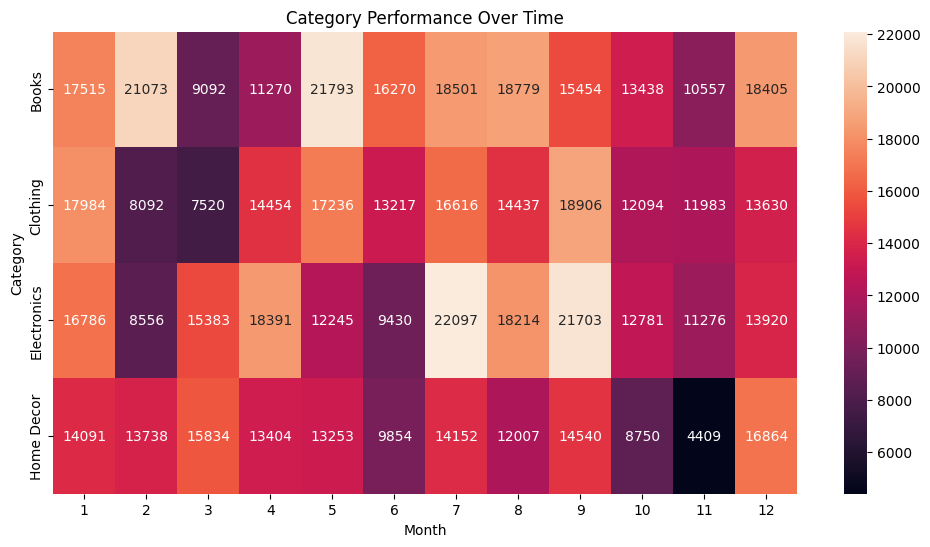

In [41]:
plt.figure(figsize=(12, 6))
sns.heatmap(category_monthly_sales, annot=True, fmt=".0f")
plt.title("Category Performance Over Time")
plt.ylabel("Category")
plt.xlabel("Month")
plt.show()